<a href="https://colab.research.google.com/github/cedeerwe/brutalna-akademia/blob/port-to-colab/noteboooks/02_suboj_minci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inštrukcie

Pred začiatkom vás poprosím spustiť príkaz z hornej lišty `Runtime -> Run All` alebo `Ctrl + F9`.  
Pre spustenie ľubovoľnej bunky kódu stlačte `Ctrl + Enter` alebo šípku vľavo od samotnej bunky.  
Toto prostredie obashuje veľa rôznych skratiek, ktoré sa spúšťajú stlačením kombinácie `Ctrl + M` a následne nejaké ďalšie tlačítko. Napríklad pomocníka na používanie tohto prostredia nájdete po stlačení `Ctrl + M` a následne `h`.

Pri názvoch sekcií často nájdete nápis `1 cell hidden` alebo niečo podobné. Text pred nimi vám vždy prezradí, čo sa v nich nachádza. Rozbalte ich iba ak chcete pokračovať ďalej, sú zabalené napríklad preto, aby ste rovno nevideli riešenia a mali ste čas sa zamyslieť.  

# Pomocný kód

In [0]:
import graphviz

COLOR_VYHRA_PRVY = "darkorange"
COLOR_VYHRA_DRUHY = "darkorchid"
COLOR_HLAVA = "forestgreen"
COLOR_ZNAK = "red"

HLAVA = "H"
ZNAK = "Z"
PRAZDNY = "_"

HODY = [HLAVA, ZNAK, PRAZDNY]
FARBY = {HLAVA: COLOR_HLAVA, ZNAK: COLOR_ZNAK}

def graf1_1():
    d = graphviz.Digraph(graph_attr={"rankdir": "LR"})
    for prvy_hod in HODY:
        for druhy_hod in HODY:
            if druhy_hod == PRAZDNY and prvy_hod != PRAZDNY:
                continue # vynechaj tieto moznosti
            for novy_hod in [HLAVA, ZNAK]:
                d.edge(prvy_hod + druhy_hod, druhy_hod + novy_hod, color=FARBY[novy_hod])
    d.node(HLAVA + ZNAK, color=COLOR_VYHRA_PRVY)
    d.node(HLAVA + HLAVA, color=COLOR_VYHRA_DRUHY)
    return d

def graf1_2():
    d = graphviz.Digraph(graph_attr={"rankdir": "LR"})
    d.edge(PRAZDNY + PRAZDNY, PRAZDNY + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY, PRAZDNY + PRAZDNY, color=FARBY[ZNAK])
    d.edge(PRAZDNY + HLAVA, HLAVA + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + HLAVA, HLAVA + ZNAK, color=FARBY[ZNAK])
    d.node(HLAVA + ZNAK, color=COLOR_VYHRA_PRVY)
    d.node(HLAVA + HLAVA, color=COLOR_VYHRA_DRUHY)
    return d

def graf2_1():
    d = graphviz.Digraph(graph_attr={"rankdir": "LR"})
    for prvy_hod in HODY:
        for druhy_hod in HODY:
            if druhy_hod == PRAZDNY and prvy_hod != PRAZDNY:
                continue # vynechaj tieto moznosti
            for novy_hod in [HLAVA, ZNAK]:
                d.edge(prvy_hod + druhy_hod, druhy_hod + novy_hod, color=FARBY[novy_hod])
    d.node(ZNAK + HLAVA, color=COLOR_VYHRA_PRVY)
    d.node(HLAVA + HLAVA, color=COLOR_VYHRA_DRUHY)
    return d

def graf2_2():
    d = graphviz.Digraph(graph_attr={"rankdir": "LR"})
    d.edge(PRAZDNY + PRAZDNY, PRAZDNY + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY, PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + HLAVA, HLAVA + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + HLAVA, PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + ZNAK, ZNAK + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + ZNAK, PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.node(ZNAK + HLAVA, color=COLOR_VYHRA_PRVY)
    d.node(HLAVA + HLAVA, color=COLOR_VYHRA_DRUHY)
    return d

def graf3_1():
    d = graphviz.Digraph()
    for prvy_hod in HODY:
        for druhy_hod in HODY:
            for treti_hod in HODY:
                if (druhy_hod == PRAZDNY and prvy_hod != PRAZDNY) or (
                    treti_hod == PRAZDNY and (prvy_hod != PRAZDNY or druhy_hod != PRAZDNY)):
                    continue # vynechaj tieto moznosti
                for novy_hod in [HLAVA, ZNAK]:
                    d.edge(
                        prvy_hod + druhy_hod + treti_hod,
                        druhy_hod + treti_hod + novy_hod,
                        color=FARBY[novy_hod]
                    )
    d.node(HLAVA + HLAVA + ZNAK, color=COLOR_VYHRA_PRVY)
    d.node(ZNAK + HLAVA + HLAVA, color=COLOR_VYHRA_DRUHY)
    return d

def graf3_2():
    d = graphviz.Digraph(graph_attr={"rankdir": "LR"})
    d.edge(PRAZDNY + PRAZDNY + PRAZDNY, PRAZDNY + PRAZDNY + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY + PRAZDNY, PRAZDNY + PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + PRAZDNY + HLAVA, PRAZDNY + HLAVA + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY + HLAVA, PRAZDNY + PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + PRAZDNY + ZNAK, PRAZDNY + ZNAK + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY + ZNAK, PRAZDNY + PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + HLAVA + HLAVA, PRAZDNY + HLAVA + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + HLAVA + HLAVA, HLAVA + HLAVA + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + ZNAK + HLAVA, ZNAK + HLAVA + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + ZNAK + HLAVA, PRAZDNY + PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.node(HLAVA + HLAVA + ZNAK, color=COLOR_VYHRA_PRVY)
    d.node(ZNAK + HLAVA + HLAVA, color=COLOR_VYHRA_DRUHY)
    return d

def graf4_1():
    d = graphviz.Digraph()
    for prvy_hod in HODY:
        for druhy_hod in HODY:
            for treti_hod in HODY:
                if (druhy_hod == PRAZDNY and prvy_hod != PRAZDNY) or (
                    treti_hod == PRAZDNY and (prvy_hod != PRAZDNY or druhy_hod != PRAZDNY)):
                    continue # vynechaj tieto moznosti
                for novy_hod in [HLAVA, ZNAK]:
                    d.edge(
                        prvy_hod + druhy_hod + treti_hod,
                        druhy_hod + treti_hod + novy_hod,
                        color=FARBY[novy_hod]
                    )
    d.node(HLAVA + ZNAK + ZNAK, color=COLOR_VYHRA_PRVY)
    d.node(ZNAK + HLAVA + ZNAK, color=COLOR_VYHRA_DRUHY)
    return d

def graf4_2():
    d = graphviz.Digraph(graph_attr={"rankdir": "LR"})
    d.edge(PRAZDNY + PRAZDNY + PRAZDNY, PRAZDNY + PRAZDNY + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY + PRAZDNY, PRAZDNY + PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + PRAZDNY + HLAVA, PRAZDNY + PRAZDNY + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY + HLAVA, PRAZDNY + HLAVA + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + PRAZDNY + ZNAK, PRAZDNY + ZNAK + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + PRAZDNY + ZNAK, PRAZDNY + PRAZDNY + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + HLAVA + ZNAK, PRAZDNY + ZNAK + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + HLAVA + ZNAK, HLAVA + ZNAK + ZNAK, color=FARBY[ZNAK])
    d.edge(PRAZDNY + ZNAK + HLAVA, PRAZDNY + PRAZDNY + HLAVA, color=FARBY[HLAVA])
    d.edge(PRAZDNY + ZNAK + HLAVA, ZNAK + HLAVA + ZNAK, color=FARBY[ZNAK])
    d.node(HLAVA + ZNAK + ZNAK, color=COLOR_VYHRA_PRVY)
    d.node(ZNAK + HLAVA + ZNAK, color=COLOR_VYHRA_DRUHY)
    return d

# Úloha č. 1
Dnes sa budeme venovať nasledujúcej hre: hádžeme mincou, až kým jeden z hráčov nevyhrá. Prvý hráč vyhrá, ak padne za sebou hlava-znak. Druhý hráč vyhrá, ak padne za sebou hlava-hlava. **Ktorý hráč má väčšiu šancu, že vyhrá? O koľko presne?**

## Nápovedy

### Nápoveda 1

Podobne ako na minulej hodine, budeme hádzať mincou, až kým niečo nebude splnené. Premyslite si, ako použiť vedomosti a hlavnú techniku z minulej hodiny na takýto druh príkladu.

### Nápoveda 2

Nakreslite si všetky možné stavy a vzťahy medzi nimi do pekného grafu. Skúste z neho vymyslieť riešenie.

## Riešenie

Poriadne sa zamyslite predtým, ako budete čítať ďalej. Toto nie je kniha, ale interaktívna lekcia o tom, ako samostatne použiť matematiku na riešenie rozličných problémov.

### Odhad

Ako na minulej hodine, odhady budeme robiť rýchle. Ponúknu nám základnú intuíciu o probléme.

Z minulej hodiny vieme, že treba v priemere $4$ hody na to, aby padla hlava-znak a zároveň, že treba v priemere $6$ hody na to, aby padli dve hlavy po sebe. Prvotný odhad by teda dával zmysel, že väčšiu šancu vyhrať má hlava-znak. Nie je úplne jasné o koľko, ale pomerovo by sme čakali niečo ako $\tfrac{2}{3}$. 

### Simulácia

Podobných simulácii sme už na minulej hodine niekoľko robili, nemalo by ísť o nič nové. Pozorne si ale kód prečítajte, aby ste mu dobre rozumeli a vedeli aj sami napísať niečo podobné.

In [0]:
import random
HLAVA = "H" # uložíme si tieto dva špeciálne znaky, aby sa nám lepšie čítal kód
ZNAK = "Z"

def hadz_hlava_hlava_proti_hlava_znak():
    posledny_hod = ""
    while True:
        hod = HLAVA if random.random() < 0.5 else ZNAK
        if [posledny_hod, hod] == [HLAVA, ZNAK]: # porovnáme minulý hod a súčasný proti hlave a znaku.
            return 1 # vyhral prvý hráč
        if [posledny_hod, hod] == [HLAVA, HLAVA]: # porovnáme minulý hod a súčasný proti hlave a hlave.
            return 0 # vyhral druhý hráč
        posledny_hod = hod # ak nikto nevyhral, súčasným hodom si prepíšeme posledný

In [0]:
hadz_hlava_hlava_proti_hlava_znak()

0

In [0]:
N = 10000
sum(hadz_hlava_hlava_proti_hlava_znak() for i in range(N)) / N

0.4906

To je zaujímavý výsledok, keďže nám nesedí úplne s odhadom. Kde sme spravili chybu, v kóde alebo v odhade? Keď máte premyslené, môžme pokračovať k matematickému riešeniu.

### Matematika

Skúsme si zapísať túto hru pomocou našich grafov z minulej hodiny. V prvom rade si musíme premyslieť, aké sú všetky situácie, v ktorých môžme byť?
- `__`: nepadlo ešte nič, práve začíname,
- `_H`, `_Z`: sme po prvom hode a padla jedna hlava respektíve jeden znak,
- `HH`, `HZ`, `ZH`, `ZZ`: posledné dva hody boli hlava-hlava, atď..

Zakreslime si do pekného prehľadného grafu vzťahy medzi všetkými týmito možnosťami:

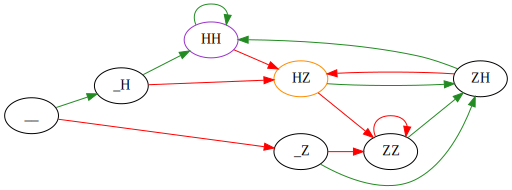

In [0]:
graf1_1()

Oranžovou farbou je označená výherná situácia za prvého hráča a fialovou druhého hráča.

Ak sa pozrieme dosť pozorne na graf, môžme si všimnúť, že jediné šípky do výherných pozícií vedú zo stavov `_H` a `ZH`. Z oboch stavov ide práve jedna šípka k výhre prvého a práve jedna šípka k výhre druhého hráča. Šanca na výhru každého hráča by teda mala byť $\tfrac{1}{2}$.

Prišli sme k tomu ale celkom zložitou cestou, skúsme si to zjednodušiť. Z pohľadu tejto hry sú stavy `__`, `_Z` a `ZZ` úplne totožné. Nehodili sme nič dôležité pre žiadneho z hráčov. Tieto stavy si označíme ako `__`. Rovnako stavy `_H` a `ZH` sú totožné $\rightarrow$ posledná bola hlava a predtým padlo niečo nedôležité. A teraz si skúsme prekresliť graf. Ako by vyzeral?

#### Pokračovanie

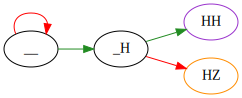

In [0]:
graf1_2()

Overte si, že tento nový graf zachycuje podstatu hry rovnako ako náš prvý graf. Ostávajú zachované šípky, pravdepodobnosti aj stavy.

Z tohto grafu je pekne vidieť, ako bude hra prebiehať. Budeme hádzať nedôležité veci, až kým padne prvá hlava. Potom sa ďalším hodom už rozhodne, a tento hod bude fifty-fifty, teda obaja hráči majú rovnakú šancu na výhru.

Vidíme teda, že sme sa mýlili v našom odhade. Prečo sme sa ale zmýlili?

Ak by každý hráč hádzal vlastnou mincou a tiež by sme čakali, komu padne prvému jeho postupnosť, náš odhad by bol pravdepodobne správny. Jednalo by sa totiž o **nezávislé** udalosti. V prípade našej hry sú ale hody mincou **závislé**. Dôvod, prečo v priemere padne rýchlejšie hlava-znak bol, že ak sa nám po hodení prvej hlavy nepodarí hodiť rovno znak, tak sa dostaneme do stavu, že stále máme hodenú hlavu. V našej dnešnej hre sa ale rovno dostaneme do stavu prehry, pretože sme práve hodili postupnosť hlava-hlava.

Závislé a nezávislé udalosti sú v pravdepodobnosti ťažký oriešok a my sme práve videli prvý príklad na túto tému. Budeme sa s nimi stretávať veľa, takže aj keď ste hneď nepochopili o čo ide, nebojte sa ísť ďalej. Budeme mať ešte veľa času na precvičovanie a premýšľanie.

# Úloha č.2
Hráme sa rovnakú hru, akurát prvý hráč vyhrá, ak padne znak-hlava. **Zmení sa niečo? Aké sú pravdepodobnosti?**

## Riešenie

### Odhad

Náš predchádzajúci odhad bol chybný, lebo sme nerátali so závislosťou medzi postupnosťami hlava-hlava a hlava-znak. Očividne nás takéto príklady môžu všeličím prekvapiť.

Teraz ale znejú naše postupnosti dosť odlišne, tak by nám odhady z minulého príkladu možno mohli fungovať. Na prvý pohľad sa v tejto úlohe nedostaneme do podobného stavu ako `_H` a preto nevidíme *očividný* dôvod, aby to bolo zase $\tfrac{1}{2}$ a nie povedzme $\frac{2}{3}$ v prospech znak-hlava.

### Simulácia

Skúsime si to naprogramovať vo všeobecnosti pre ľubovoľné dva posledné hody.

In [0]:
def hadz_kym_dva_posledne(hrac1, hrac2): # hráč bude charakterizovaný dvojicou vysledkov hodov
    posledny_hod = ""
    while True:
        hod = HLAVA if random.random() < 0.5 else ZNAK
        if [posledny_hod, hod] == hrac1: # ak sa posledné dva hody rovnajú hráčovi, skončime
            return 1
        if [posledny_hod, hod] == hrac2:
            return 0
        posledny_hod = hod

In [0]:
hadz_kym_dva_posledne([HLAVA, HLAVA], [ZNAK, HLAVA])

0

In [0]:
N = 10000
sum(hadz_kym_dva_posledne([HLAVA, HLAVA], [ZNAK, HLAVA]) for i in range(N)) / N

0.2456

Kód si môžme overiť aj tým, že dáva rovnaké výsledky pre prvý príklad ako predchádzajúci kód. Skúste si to overiť.

Pravdepodobnosť vyzerá byť okolo $\tfrac{3}{4}$, takže náš odhad bol tentoraz celkom dobrý. Teda, aspoň to tak zatiaľ vyzerá.

### Matematika

V minulom príklade sme si nakreslili všetky vzťahy medzi stavmi, môžme sa teda iba pozrieť na už hotové dielo a akurát si preznačiť víťazné vrcholy.

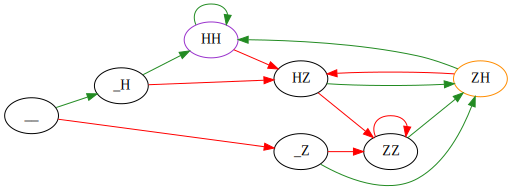

In [0]:
graf2_1()

Tento graf je torcha komplikovanejší, ale tiež si môžme niečo všimnúť. Do stavu `HH` sa vieme dostať buď zo stavu `ZH` - čo sa nikdy nestane, lebo stavom `ZH` končíme - alebo zo stavu `_H`. Do stavu `_H` sa vieme dostať iba zo stavu `__`. Do stavu `__` sa ale nevieme dostať vôbec, iba keď v ňom začíname. Takže jediná šanca na výhru druhého hráča je, že by hodil rovno `HH` za sebou ako prvé dva hody. Všetky ostatné cesty vedú do `ZH`. Šanca na hodenie `HH` ako prvé dva hody je $\tfrac{1}{4}$ a teda šanca výhry druhého hráča je zvyšok: $\tfrac{3}{4}$.

Rovnako ako minule, aj teraz si skúsme tento graf zjednodušiť a možno si všimneme nejaký zaujímavý vzťah. Ako by v tomto prípade vyzeral zmenšený graf, bez zbytočných vrcholov? 

#### Pokračovanie

Podstatné stavy budú:
- `__`: nehodili sme ešte nič podstatné
- `_H`, `_Z`: posledný hod bol hlava, respektíve znak, a hod predtým bol nezaujímavý
- `HH`, `ZH`: posledné dva hody boli výherné 

V princípe sa k týmto stavom vieme dostať tak, že si napíšeme výsledné stavy a všetky stavy na ceste k nim. Ostatné nie sú zaujímavé. Hrany si vieme dokresliť tak, že si premyslíme, čo sa stane po pridaní hlavy / znaku na koniec predchádzajúceho stavu a do ktorého stavu nás to dostane. 

Zmenšený graf bude vyzerať nasledovne:

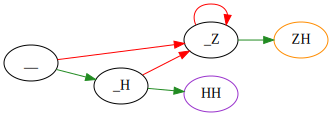

In [0]:
graf2_2()

Nezabudnite si zase poriadne overiť, že naozaj ide o správny graf.

Čo sa teda v tomto prípade deje? Akonáhle padne ľubovoľný znak, už sme skončili. Jeden pohľad je, že zo stavu s posledným znakom buď rovno vyhrá prvý hráč, alebo bude zase posledný znak. 

Druhý pohľad je, že aby vyhral druhý hráč, potrebuje hodiť dve hlavy po sebe. V momente keď ich hodí pred nimi ale nemôže byť znak, pretože by už vyhral prvý hráč svojou postupnosťou znak-hlava. To je splnené iba ak nepadne žiaden znak.

Akokoľvek si tento graf vysvetlíme, pravdepodobnosti vyjdú tie isté - druhý hráč vyhrá, iba ak hodí po sebe dve hlavy, čo je pravdepodobnosť $\tfrac{1}{4}$.

# Úloha č. 3
Keď už sme sa rozohriali, predĺžime si postupnosti. Ako dopadne **hlava - hlava - znak** proti **znak - hlava - hlava?** 

## Nápoveda

Nakresliť si celý veľký graf všetkých stavov je určite cesta, ale náročná. Navyše v ňom bude ťažké niečo vidieť pravdepodobne nič neuvidíme. Skúste si rovno nakresliť zmenšený graf, možno v ňom niečo uvidíte.

## Riešenie

### Odhad

Ak sme si správne spravili domácu úlohu z minulej hodiny, dostali sme sa k číslam, že na hodenie oboch postupností treba v priemere $8$ hodov. Na základe tohto čísla je ťažké povedať, ktorý hráč má väčšiu šancu vyhrať.

Môžme si ale všimnúť, že na chvoste postupnosti znak-hlava-hlava sú prvé dva hody postupnosti hlava-hlava-znak. Dáva teda zmysel, že by to mohlo dopadnúť podobne, ako znak-hlava proti hlava-hlava, teda tentoraz v prospech druhého hráča. Pravdepodobnostne by to mohlo byť tiež podobne.

### Simulácia

Nasimulujme si rovno všeobecne všetky súboje dĺžky $3$, obdobne ako sme to spravili v druhej úlohe. Stačia drobné úpravy na zapamätanie predposledného hodu.

In [0]:
def hadz_kym_tri_posledne(hrac1, hrac2):
    posledny_hod = "" 
    predposledny_hod = ""
    while True:
        hod = HLAVA if random.random() < 0.5 else ZNAK
        if [posledny_hod, predposledny_hod, hod] == hrac1:
            return 1
        if [posledny_hod, predposledny_hod, hod] == hrac2:
            return 0
        posledny_hod, predposledny_hod = hod, posledny_hod

In [0]:
hrac1 = [HLAVA, HLAVA, ZNAK]
hrac2 = [ZNAK, HLAVA, HLAVA]
hadz_kym_tri_posledne(hrac1, hrac2)

0

In [0]:
N = 10000
sum(hadz_kym_tri_posledne(hrac1, hrac2) for i in range(N)) / N

0.6652

Zase nám odhad nesedí s výsledkom zo simulácie. Skúste identifikovať chybu predtým, ako sa pustíme do matematického dokazovania.

### Matematika

Pre úplnosť sme si pre vás pripravili graf všetkých možných stavov, obdobne ako v predchádzajúcich úlohách. Je mierne väčší a menej prehľadný, ale rozhodne zaujímavý:

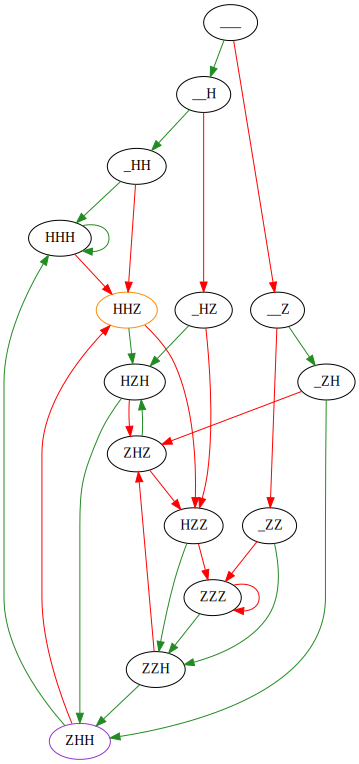

In [0]:
graf3_1()

Pre brutálnych odporúčame skúsiť uvidieť riešenie príkladu priamo v tomto grafe.

My ostatní si to zjednodušíme a nakreslíme si zmenšený graf. Zaujímavé stavy sú `___`, `__H`, `_HH`, `HHZ`, `__Z`, `_ZH` a `ZHH`. Vzťahy medzi nimi si musíme chvíľu premyslieť, ale mali by sme sa dostať k niečomu takémuto: 

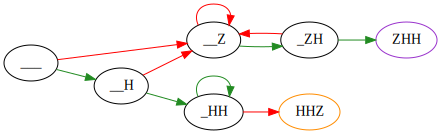

In [0]:
graf3_2()

Z tohto grafu je krásne vidieť, že sme v rovnakej situácii ako v druhej úlohe, iba sme za konečné pozície `ZH` a `HH` pridali ešte jeden vrchol, do ktorého sa ináč dostať nedá. Pravdepodobnosť teda bude tiež rovnaká a druhý hráč vyhráva s šancou $\tfrac{3}{4}$.

Kde sme teda mali chybu? Očividne v kóde, pretože odhad nám dával rovnaký výsledok. Alebo v matematike aj odhade. Nájdenie chýb a ich opravenie už necháme na vás.

# Úloha č. 4
Záverečná úloha z hodiny bude zrátať pravdepodobnosti výhry hráča s postupnosťou **hlava-znak-znak** proti hráčovi s postupnosťou **znak-hlava-znak**.

## Riešenie

### Odhad

V domácej úlohe z minulej hodiny sme si zrátali, že priemerný počet hodov na hodenie postupnosti hlava-znak-znak je $8$ hodov a postupnosti znak-hlava-znak je $10$. To nám napovedá, že prvý hráč by mohol mať nejakú výhodu. 

Na druhú stranu zase vidíme, že posledné dva hody druhého hráča sú rovnaké ako prvé dva hody prvého hráča. V predchádzajúcich dvoch úlohách to malo silný význam, mohlo by to mať význam aj teraz.

Máme teda situáciu, keď majú obaja hráči navrch z nejakého dôvodu. Ktorý z dôvodov preváži, si môžme len tipnúť. Nemala by nás ale prekvapiť ani možná remíza. 

### Simulácia

Použijeme opravený kód z tretej úlohy, dúfame, že ste prišli na rovnakú chybu.

In [0]:
def hadz_kym_tri_posledne_spravne(hrac1, hrac2):
    posledny_hod = "" 
    predposledny_hod = ""
    while True:
        hod = HLAVA if random.random() < 0.5 else ZNAK
        if [posledny_hod, predposledny_hod, hod] == hrac1:
            return 1
        if [posledny_hod, predposledny_hod, hod] == hrac2:
            return 0
        posledny_hod, predposledny_hod = predposledny_hod, hod

In [0]:
hrac1 = [HLAVA, ZNAK, ZNAK]
hrac2 = [ZNAK, HLAVA, ZNAK]

hadz_kym_tri_posledne_spravne(hrac1, hrac2)

0

In [0]:
N = 10000
sum(hadz_kym_tri_posledne_spravne(hrac1, hrac2) for i in range(N)) / N

0.497

Tak to naozaj vyzerá na vyrovnané šance. Pozrime sa ešte, čo na to hovorí matematika.

### Matematika

Ako v minulom príklade, prikladáme úplny graf pre brutálnych. Odkomentujte (odstráňte mriežku zo začiatku) ďalšieho riadku a spustite pre zobrazenie celého grafu. Držím vám brutálnym palce pri hľadaní riešenia vo veľkom grafe.

In [0]:
# graf4_1()

My ostatní sa pozrieme na zmenšený graf. Vytvorili sme ho úplne rovnakým spôsobom ako predchádzajúci:

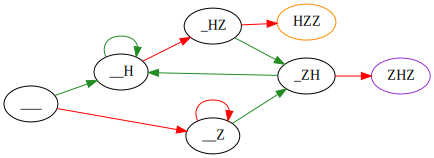

In [0]:
graf4_2()

Tento graf je o kus komplikovanejší ako naše predchádzajúce. V tomto sa nachádzajú cykly a nevidíme žiaden priamočiary spôsob, ako spočítať pravdepodobnosti. Z každého vrchola okrem koncových existuje šanca, že vyhrá každý z hráčov. Ako to teda spočítame? Necháme vám teraz s pekným obrázkom priestor na zamyslenie.

#### Nápoveda

Spomeňte si na hlavný trik z minulej hodiny. Vedeli by sme ho využiť?

#### Riešenie

Na minulej hodine sme si zvykli označiť v podobných situáciách niektoré hodnoty a potom s nimi počítať. Skúsime to aj teraz. 

Označme si pravdepodobnosť výhry prvého hráča v stave `_HZ` ako $p$. Zo vzťahov vidíme, že pravdepodobnosť bude rovnaká aj v stave `__H`, teda tiež $p$. 

Šanca výhry v stave `_ZH` bude polovica šance výhry v stave `ZHZ` sčítaná s polovicou šance výhry v stave `__H`. Šanca výhry v stave `ZHZ` je jednoducho $0$, lebo už vyhral druhý hráč. Šanca v stave `_ZH` bude teda $\tfrac{1}{2}p$.

Teraz už vieme vypočítať aj `_HZ`. Keďže stav `HZZ` je rovný 1, tak stav `_HZ` vypočítame obdobne ako predchádzajúci, teda ako $\tfrac{1}{2} + \frac{1}{4}p$. Zároveň je rovný $p$, lebo tak sme ho označili na začiatku. Ak dáme tieto dva výsledky do rovnosti, dostávame $p = \tfrac{1}{2} + \tfrac{1}{4}p$ a vypočítame $p = \tfrac{2}{3}.$

Stále nám ešte chýba vypočítať pravdepodobnosť výhry zo začiatočnej pozície. Na to nám ešte chýba pravdepodobnosť v stave `__Z`, ktorá je ale rovnaká ako v stave `_ZH`, teda $\tfrac{1}{2}p$, čo je $\tfrac{1}{3}$.

Pravdepodobnosť v začiatku si teda môžme vypočítať zo stavov `__H` a `__Z` a dostávame $\tfrac{1}{2}\cdot\tfrac{1}{3} + \tfrac{1}{2}\cdot\tfrac{2}{3} = \tfrac{1}{2}$

V predchádzajúcej časti sme spravili veľa výpočtov v poradí, ktoré môže vyzerať aj ako náhodné. Ak ste zvládli tento postup sledovať, super. Ale je celkom pochopiteľné, ak ste sa v tom náhodou stratili. Niektorí majú radšej systematickejší postup, ktorý si ukážeme ako ďalší.

#### Riešenie 2

Označme si pravdepodobnosti výhry prvého hráča vo vrcholoch ako $P(x)$. Napríklad vieme, že 

$$P(\mathrm{HZZ}) \quad=\quad 1  \qquad\qquad\mathrm{a}\qquad\qquad P(\mathrm{ZHZ}) \quad=\quad 0,$$

pretože prvý hráč vyhral v situácii `HZZ` a prehral v situácii `ZHZ`.

Napíšme si teraz šípky ako rovnice medzi týmito pravdepodobnosťami. Prepisovaním šípok zhora dole dostávame

\begin{align}
P(\mathrm{\_HZ}) \quad&=\quad \tfrac{1}{2}P(\mathrm{HZZ}) + \tfrac{1}{2} P(\mathrm{\_ZH}) \quad=\quad \tfrac{1}{2} + \tfrac{1}{2}P(\mathrm{\_ZH})\\
P(\mathrm{\_\_H}) \quad&=\quad P(\mathrm{\_HZ}) \\
P(\mathrm{\_ZH}) \quad&=\quad = \tfrac{1}{2} P(\mathrm{ZHZ}) + \tfrac{1}{2} P(\mathrm{\_\_H}) \quad=\quad \tfrac{1}{2} P(\mathrm{\_\_H}) \\
P(\mathrm{\_\_\_}) \quad&=\quad \tfrac{1}{2}P(\mathrm{\_\_H}) + \tfrac{1}{2}P(\mathrm{\_\_Z}) \\
P(\mathrm{\_\_Z}) \quad&=\quad P(\mathrm{\_ZH})
\end{align}

Z tejto sústavy rovníc už vieme dorátať výsledok, úplne priamo. Môžte si to skúsiť.

Týmto sme ukončili ukážkové úlohy. Posledná bola trocha náročnejšia, ale dúfame, že ste sa ňou zvládli prekúsať.

# Domáca úloha č.1
Hádžeme mincou. Prvý hrač vyhrá ak padne po sebe 10 hláv. Akú postupnosť 10 hodov si proti nemu má vybrať druhý hráč, aby mal čo najväčšiu šancu vyhrať? Aká je to šanca?

# Domáca úloha č.2
Hádžeme kockou namiesto mince. Prvý hráč vyhrá keď padne postupne $2$, $1$, $5$. Akú postupnosť troch čísel si má vybrať druhý hráč, aby mal čo najväčšiu šancu vyhrať? Aká je to šanca?

# Úloha pre praktikov
Vymyslite si úlohu, ktorú viete vyriešiť pomocou svojich nových vedomostí. 

# Úloha pre brutálnych
Ste prvý hráč našej dnešnej hry. Druhý hráč si vyberie náhodne zo všetkých 8 možných postupností dĺžky 3. Akú postupnosť dĺžky 3 si vyberiete, aby ste mali v priemere čo najväčšiu šancu vyhrať?

# Úloha pre akademikov
Hádžeme mincou. Prvý hráč si vyberie postupnosť dĺžky $n$ výsledkov hodov mincou a prezradí nám ju. Akú postupnosť dĺžky $n$ si mám vybrať ako druhý hráč, aby som mal proti nemu čo najväčšiu šancu vyhrať?